In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import pydot

from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.search.ScoreBased.GES import ges
from causallearn.search.ConstraintBased.CDNOD import cdnod
from causallearn.utils.GraphUtils import GraphUtils
from causallearn.utils.cit import CIT
from scipy.stats import spearmanr

import itertools
import networkx as nx

In [28]:
data = pd.read_csv("../data/clean.csv")
data

group  Acetatifactor  Acinetobacter  Aeromicrobium  Aureibacillus  \
0        0            0.0            0.0            0.0            0.0   
1        0            0.0            0.0            0.0            0.0   
2        0            0.0            0.0            0.0            0.0   
3        0            0.0            0.0            0.0            0.0   
4        0            0.0            0.0            0.0            0.0   
..     ...            ...            ...            ...            ...   
943      1            0.0            0.0            0.0            0.0   
944      1            0.0            0.0            0.0            0.0   
945      1            0.0            0.0            0.0            0.0   
946      1            0.0            0.0            0.0            0.0   
947      1            0.0            0.0            0.0            0.0   

     Beggiatoa  Breznakibacter  Catenococcus  Clostridia_vadinBB60_group  \
0          0.0             0.0           0.0                    0.045935   
1          0.0             0.0           0.0                    0.043520   
2          0.0             0.0           0.0                    0.000000   
3          0.0             0.0           0.0                    0.000000   
4          0.0             0.0           0.0                    0.007486   
..         ...             ...           ...                         ...   
943        0.0             0.0           0.0                    0.000000   
944        0.0             0.0           0.0                    0.000000   
945        0.0             0.0           0.0                    0.000000   
946        0.0             0.0           0.0                    0.000000   
947        0.0             0.0           0.0                    0.000000   

     Coprococcus  ...  Rikenellaceae_RC9_gut_group  Ruminococcus  Schleiferia  \
0       0.529459  ...                          0.0      6.839446          0.0   
1       0.947776  ...                          0.0      3.428433          0.0   
2       0.399365  ...                          0.0      4.470259          0.0   
3       0.041250  ...                          0.0      7.956611          0.0   
4       1.689375  ...                          0.0      1.085492          0.0   
..           ...  ...                          ...           ...          ...   
943     0.363798  ...                          0.0      1.467568          0.0   
944     0.169985  ...                          0.0      0.000000          0.0   
945     1.763001  ...                          0.0      0.244190          0.0   
946     0.000000  ...                          0.0      0.022016          0.0   
947     0.383767  ...                          0.0      1.212703          0.0   

      Slackia  Steroidobacter  Thauera  Truepera  Tyzzerella   UCG-002  \
0    0.000000             0.0      0.0       0.0    0.140222  3.503131   
1    0.000000             0.0      0.0       0.0    0.000000  2.961799   
2    0.005830             0.0      0.0       0.0    0.000000  0.918247   
3    0.087083             0.0      0.0       0.0    0.516385  0.863188   
4    0.000000             0.0      0.0       0.0    0.000000  2.450467   
..        ...             ...      ...       ...         ...       ...   
943  0.000000             0.0      0.0       0.0    0.000000  0.267280   
944  0.000000             0.0      0.0       0.0    0.050800  0.000000   
945  0.000000             0.0      0.0       0.0    0.000000  0.966028   
946  0.000000             0.0      0.0       0.0    0.000000  0.000000   
947  0.000000             0.0      0.0       0.0    0.000000  0.846206   

      UCG-005  
0    0.834079  
1    0.041103  
2    0.033523  
3    0.200137  
4    1.766732  
..        ...  
943  0.009899  
944  0.000000  
945  0.037568  
946  0.000000  
947  0.285906  

[948 rows x 50 columns]

In [31]:
hc = data[data['group'] == 0].drop(columns='group')
pcos = data[data['group'] == 1].drop(columns='group')

# Traditional Algorithms
Just curious

In [37]:
# PC
pc_hc = pc(hc.values)
pyd = GraphUtils.to_pydot(pc_hc.G, labels=list(hc.columns))
pyd.write_png("pc_hc.png")

  0%|          | 0/49 [00:00<?, ?it/s]

In [129]:
# PC 1b)
pc_disease = pc(data.values, node_names=list(data.columns))
pyd = GraphUtils.to_pydot(pc_disease.G, labels=list(data.columns))
pyd.write_png("pc.png")

  0%|          | 0/50 [00:00<?, ?it/s]

In [133]:
for node in pc_disease.G.get_adjacent_nodes(pc_disease.G.get_node('group')):
    print(node.get_name())

Aeromicrobium
Clostridia_vadinBB60_group
Halomonas
Holdemanella
Kineothrix
Ruminococcus
Tyzzerella
UCG-005


In [38]:
# FCI
g_hc, edges_hc = fci(hc.values, independence_test_method="fisherz")
pyd = GraphUtils.to_pydot(g_hc, labels=list(hc.columns))
pyd.write_png("fci_hc.png")

  0%|          | 0/49 [00:00<?, ?it/s]

X1 --> X26
X26 --> X3
X43 --> X11
X15 --> X44
X45 --> X46


In [136]:
# FCI 1b)
g, edges = fci(data.values, independence_test_method="fisherz", node_names=list(data.columns))
pyd = GraphUtils.to_pydot(g, labels=list(data.columns))
pyd.write_png("fci.png")

  0%|          | 0/50 [00:00<?, ?it/s]

Breznakibacter --> Aureibacillus
Aureibacillus --> Truepera
Catenococcus --> Faecalibacillus
Corynebacterium --> Faecalibacterium
Mobiluncus --> Finegoldia


In [138]:
for node in g.get_adjacent_nodes(g.get_node('group')):
    print(node.get_name())

Aeromicrobium
Clostridia_vadinBB60_group
Halomonas
Holdemanella
Kineothrix
Ruminococcus
Tyzzerella
UCG-005


In [42]:
# GES
record_hc = ges(hc.values)
pyd = GraphUtils.to_pydot(record_hc, labels=list(hc.columns))
pyd.write_png("ges_hc.png")

KeyboardInterrupt: 

In [43]:
# GES 1b)
record = ges(data.values)
pyd = GraphUtils.to_pydot(record, labels=list(data.columns))
pyd.write_png("ges.png")

AttributeError: 'dict' object has no attribute 'get_nodes'

# 1a. Repeat Quarter 1

In [46]:
def make_corr_plot(data, squared=False):
    corr = data.corr(method='spearman')
    if squared:
        corr = corr**2
    full_columns = list(data.columns)

    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot()
    cax = ax.matshow(corr, cmap='coolwarm')
    fig.colorbar(cax, fraction=0.046, pad=0.04)

    xaxis = np.arange(len(full_columns))
    ax.set_xticks(xaxis, labels=full_columns, fontsize=12)
    ax.set_yticks(xaxis, labels=full_columns, fontsize=12)

    plt.setp(ax.get_xticklabels(), rotation=-60, ha="right", rotation_mode="anchor")

    return 

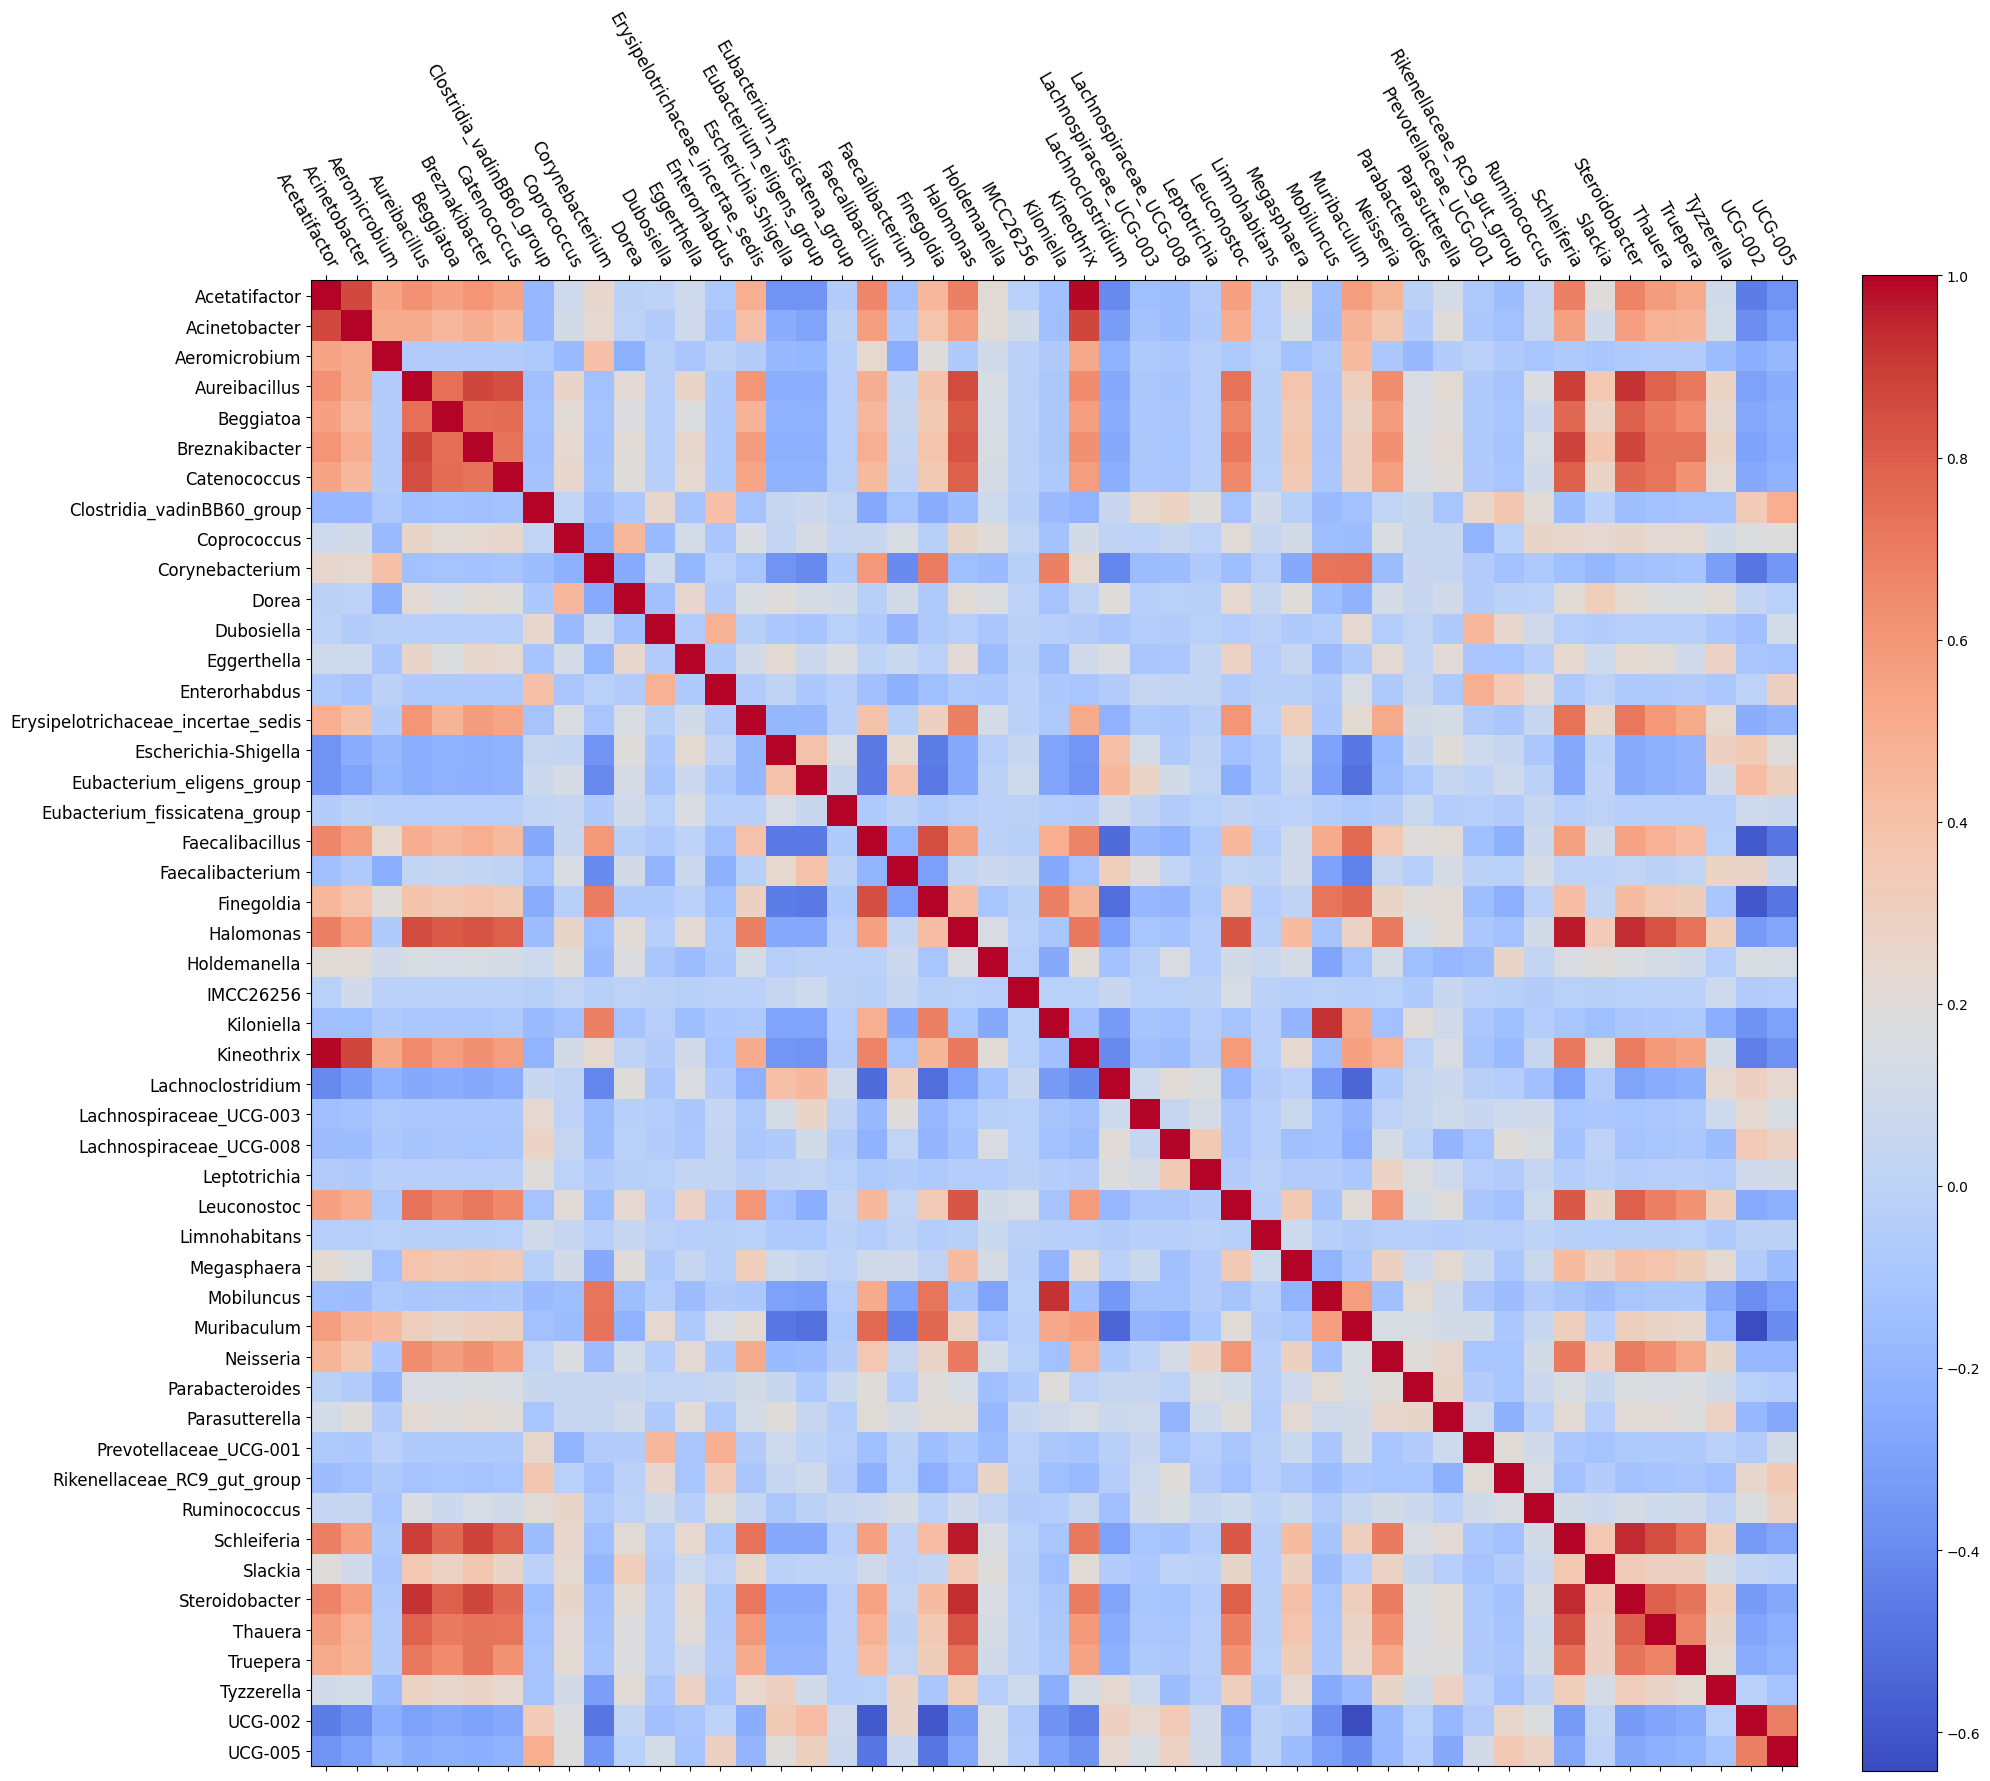

In [156]:
# get the correlational microbe-microbe network
make_corr_plot(hc)

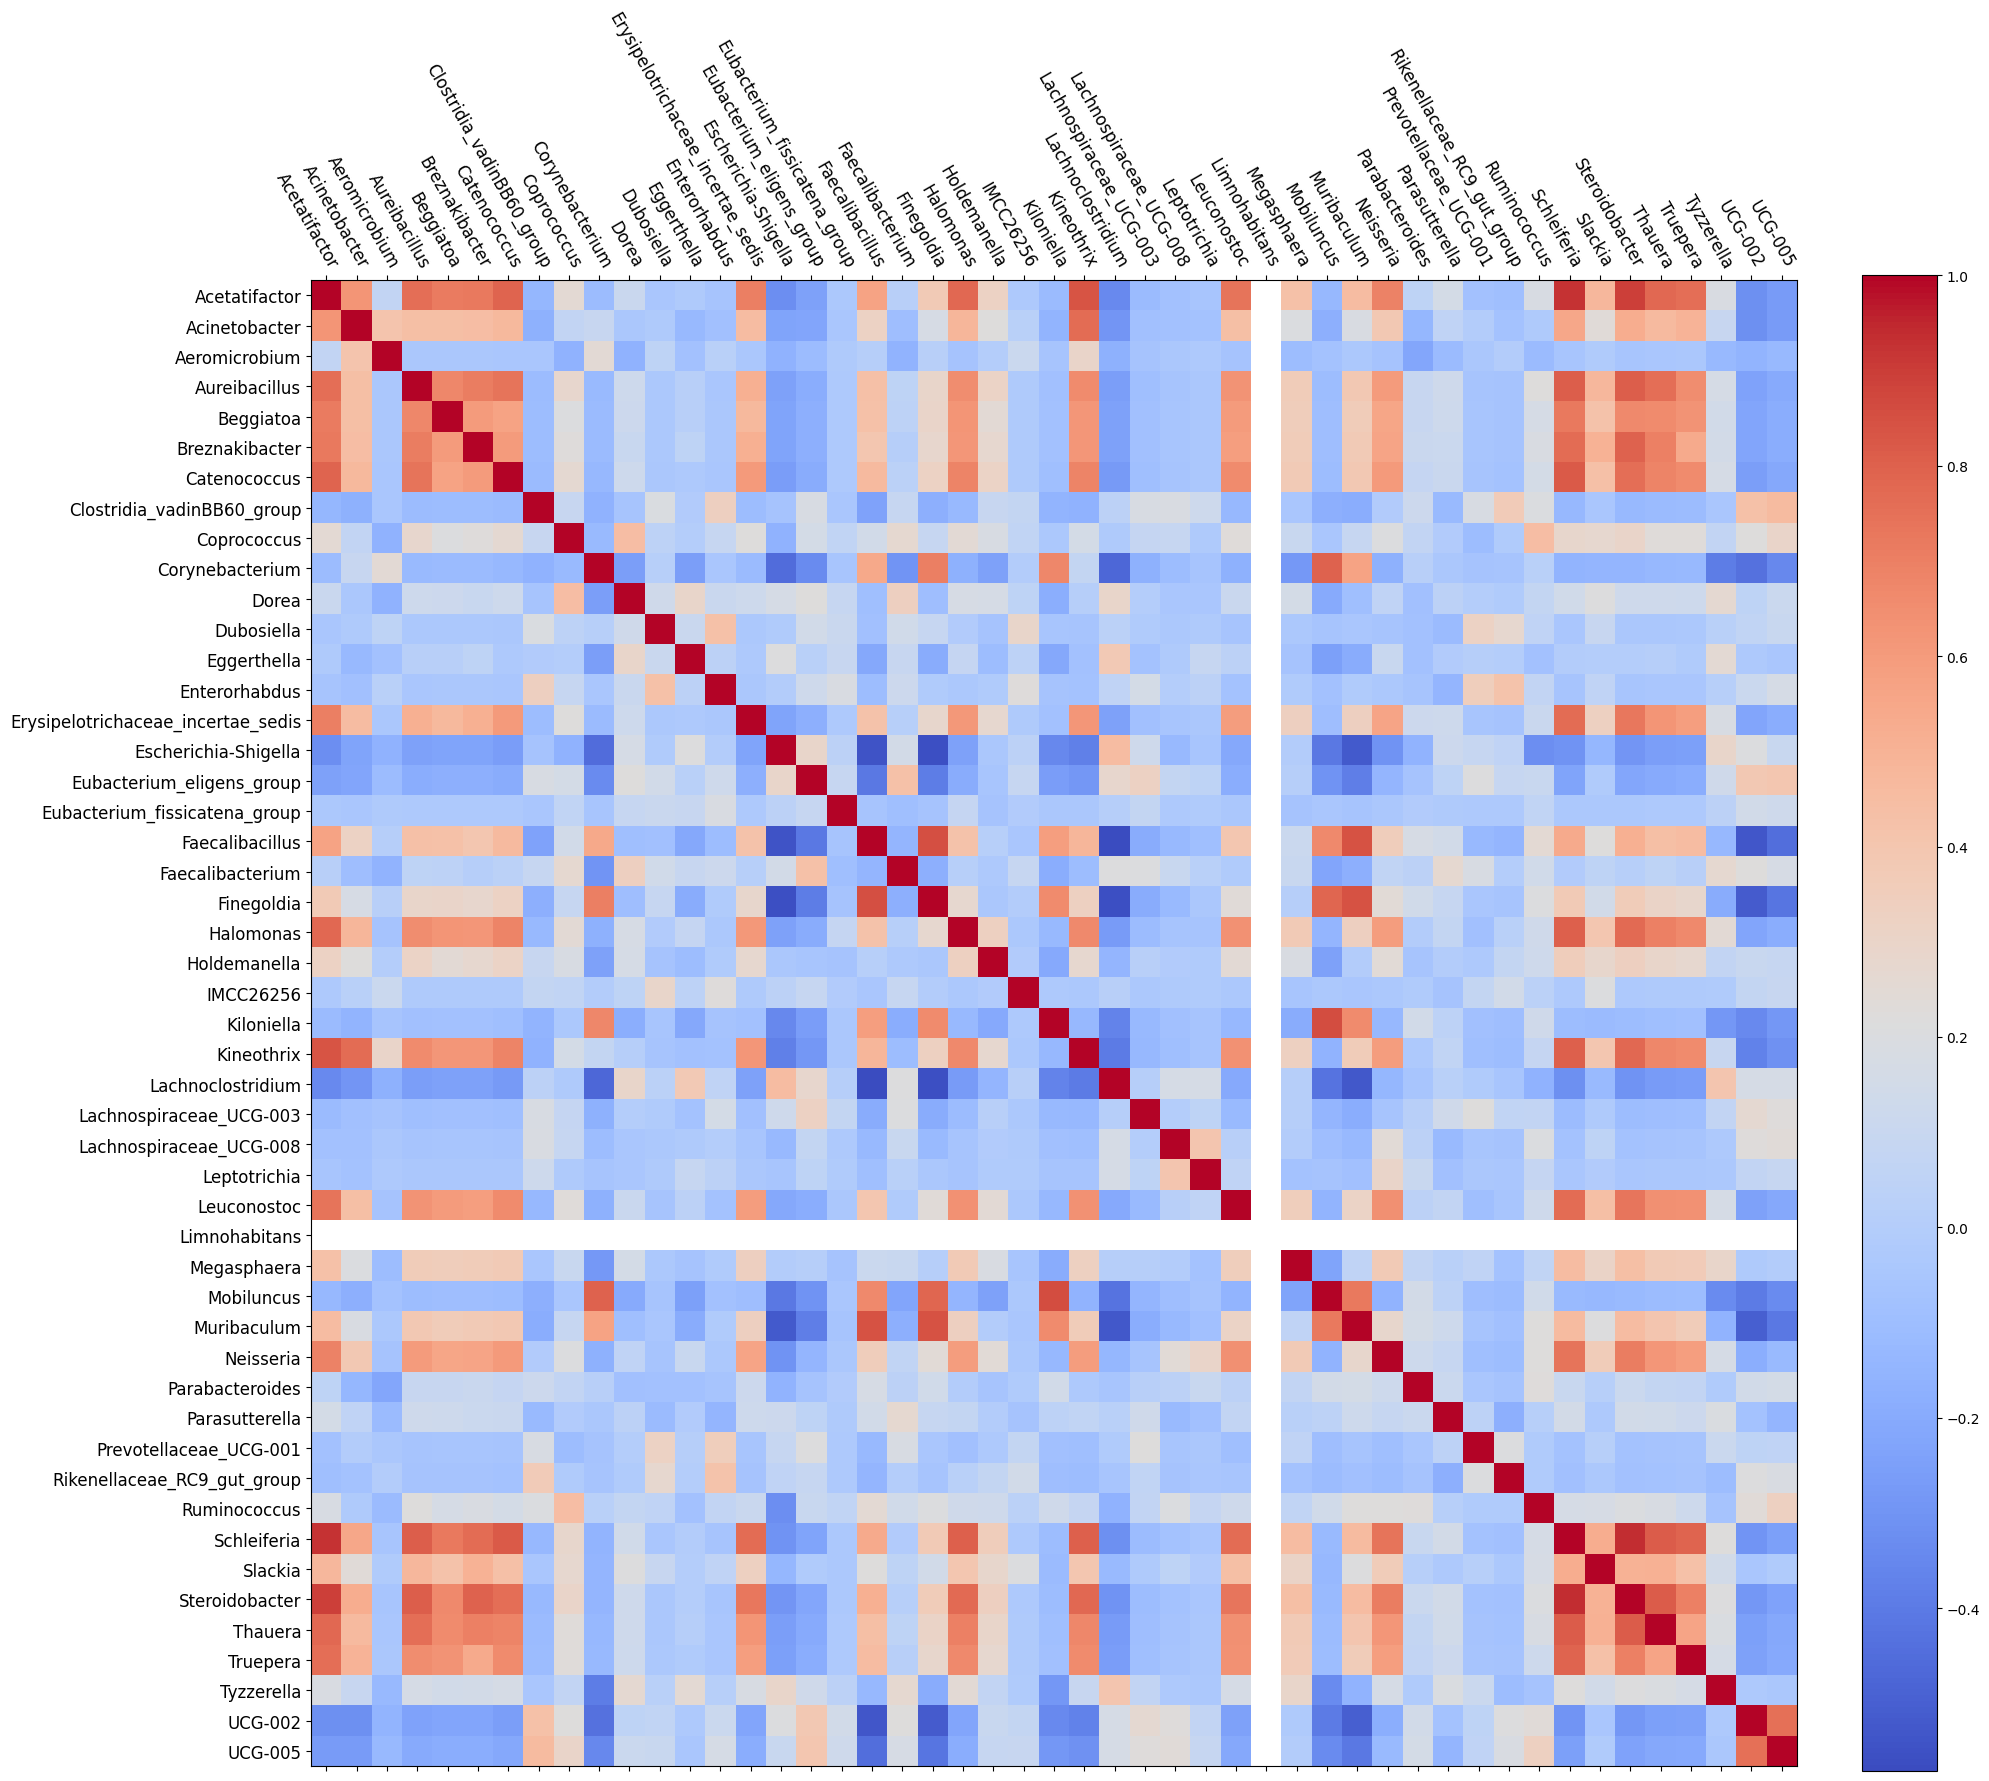

In [157]:
make_corr_plot(pcos)

In [96]:
# make adjacency matrix filter based on correlation (like the T2D paper)
# we have three options for this filter:
# 1) Spearman
# 2) SparCC
# 3) CLR + rmcorr
hc_adj = np.full((49, 49), 0)
pcos_adj = np.full((49, 49), 0)

for i in range(49):
    for j in range(49):
        hc_corr = spearmanr(hc.iloc[:, i], hc.iloc[:, j])
        pcos_corr = spearmanr(pcos.iloc[:, i], pcos.iloc[:, j])
        if hc_corr[1] < 0.05 / 1200.5: # Bonferroni correction
            hc_adj[i, j] = 1
        if pcos_corr[1] < 0.05 / 1200.5 :
            pcos_adj[i, j] = 1

hc_adj = hc_adj - np.eye(49)
pcos_adj = pcos_adj - np.eye(49)

/var/folders/hc/mnggsfz56v305wwb48gk6cjm0000gp/T/ipykernel_42246/875182586.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pcos_corr = spearmanr(pcos.iloc[:, i], pcos.iloc[:, j])


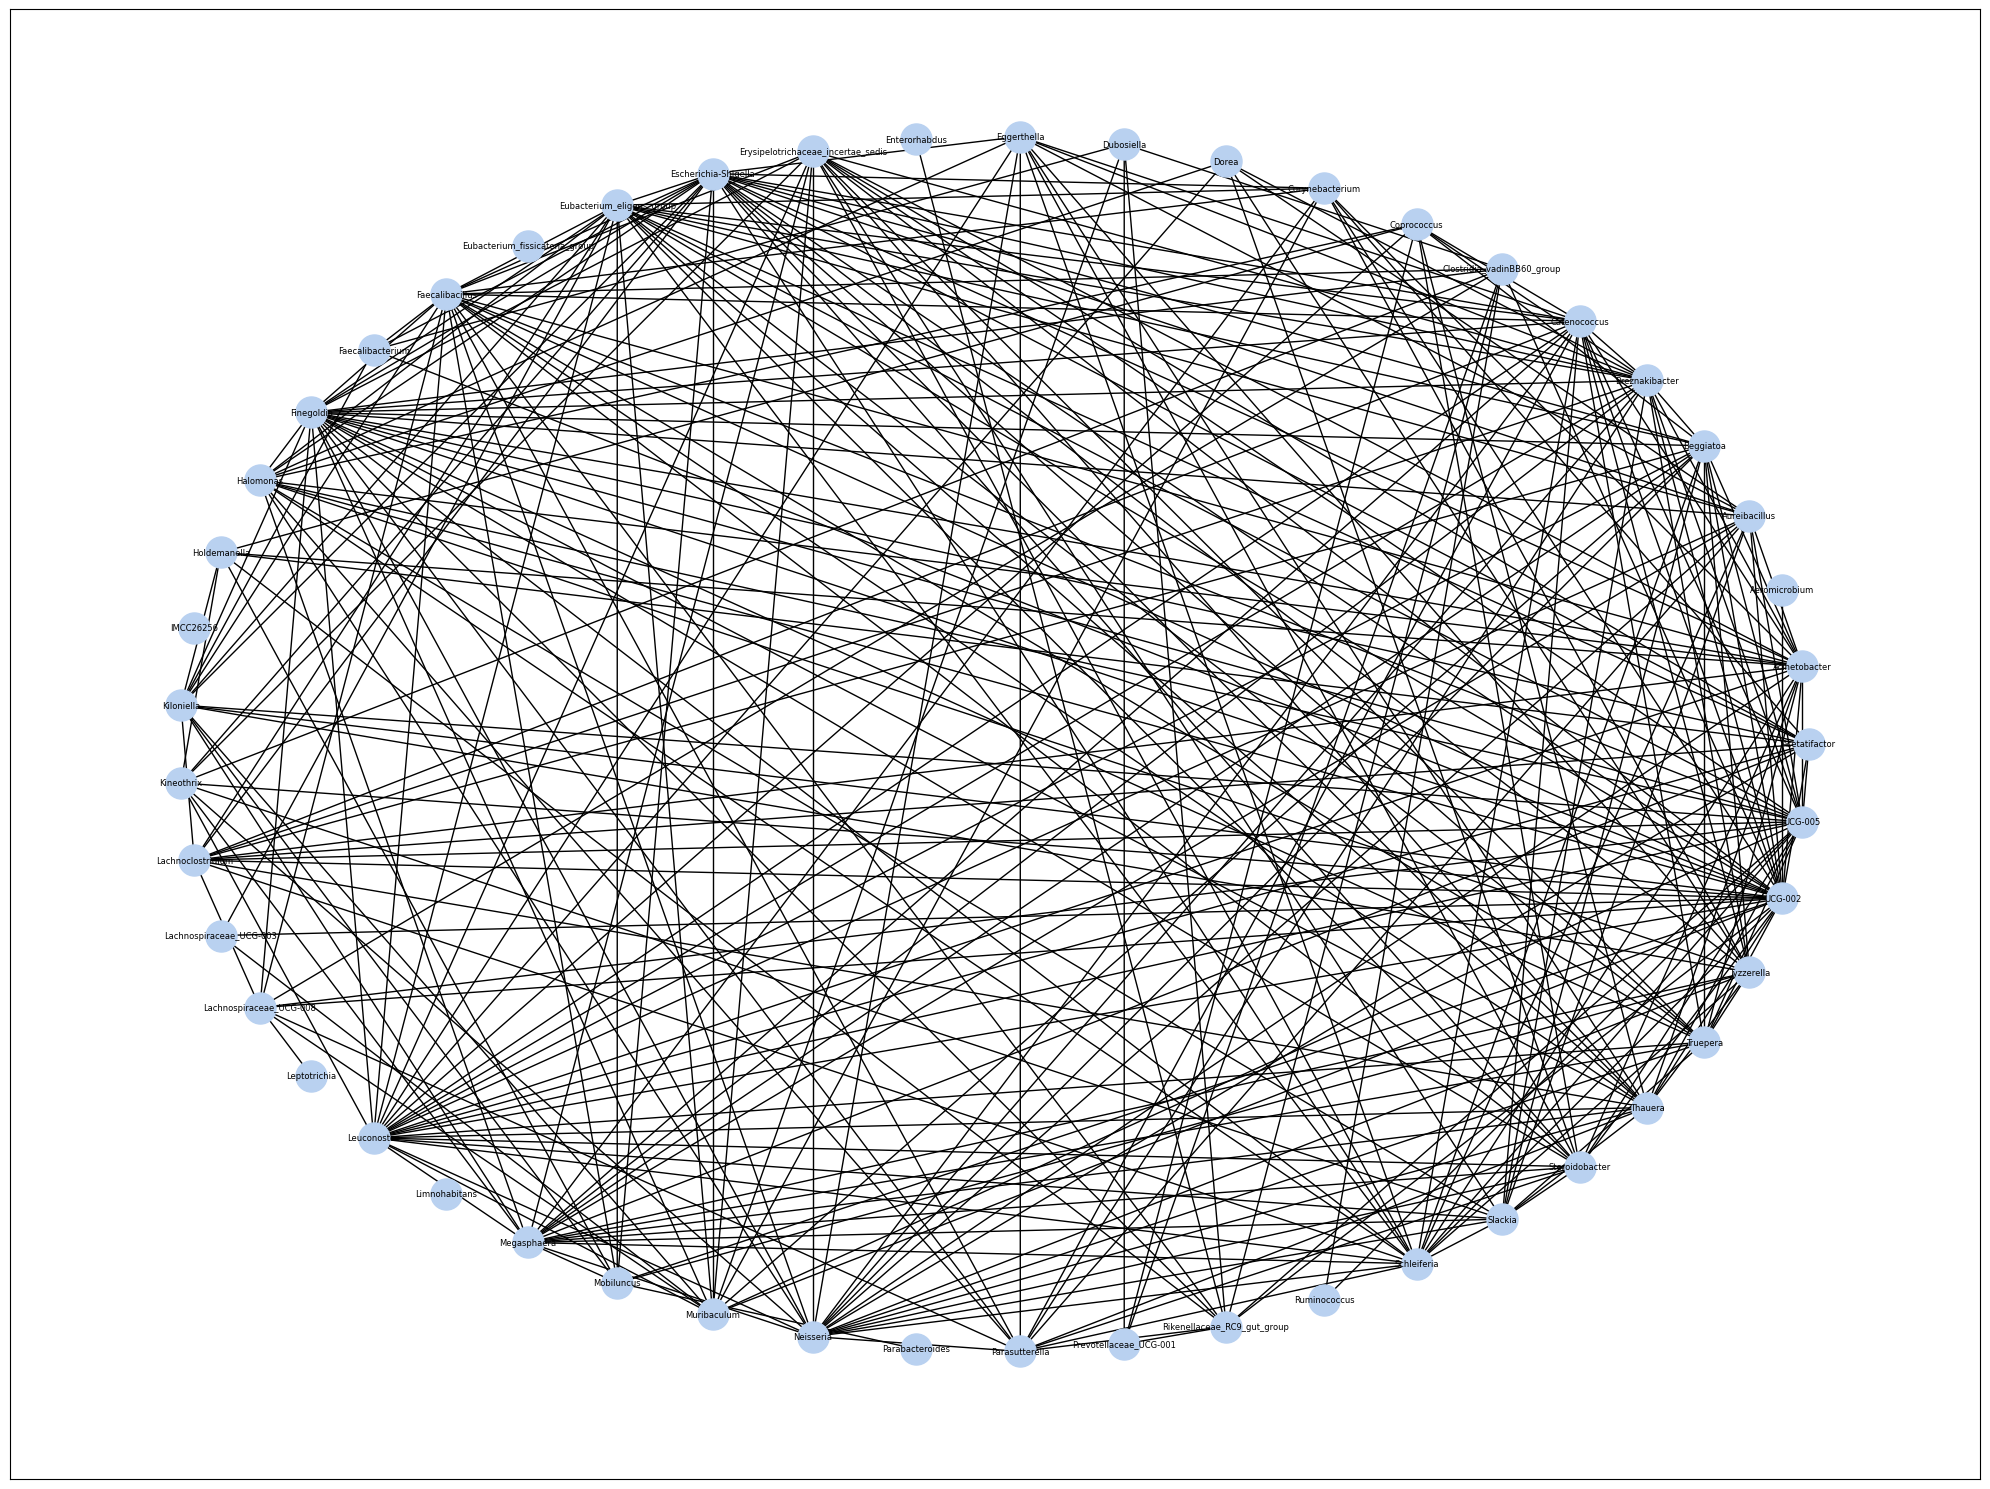

In [103]:
hc_ouralg = run_ouralg(hc_adj, hc, list(hc.columns), fisherz)
graph_networkx(hc_ouralg, list(hc.columns), 'ouralg_hc')

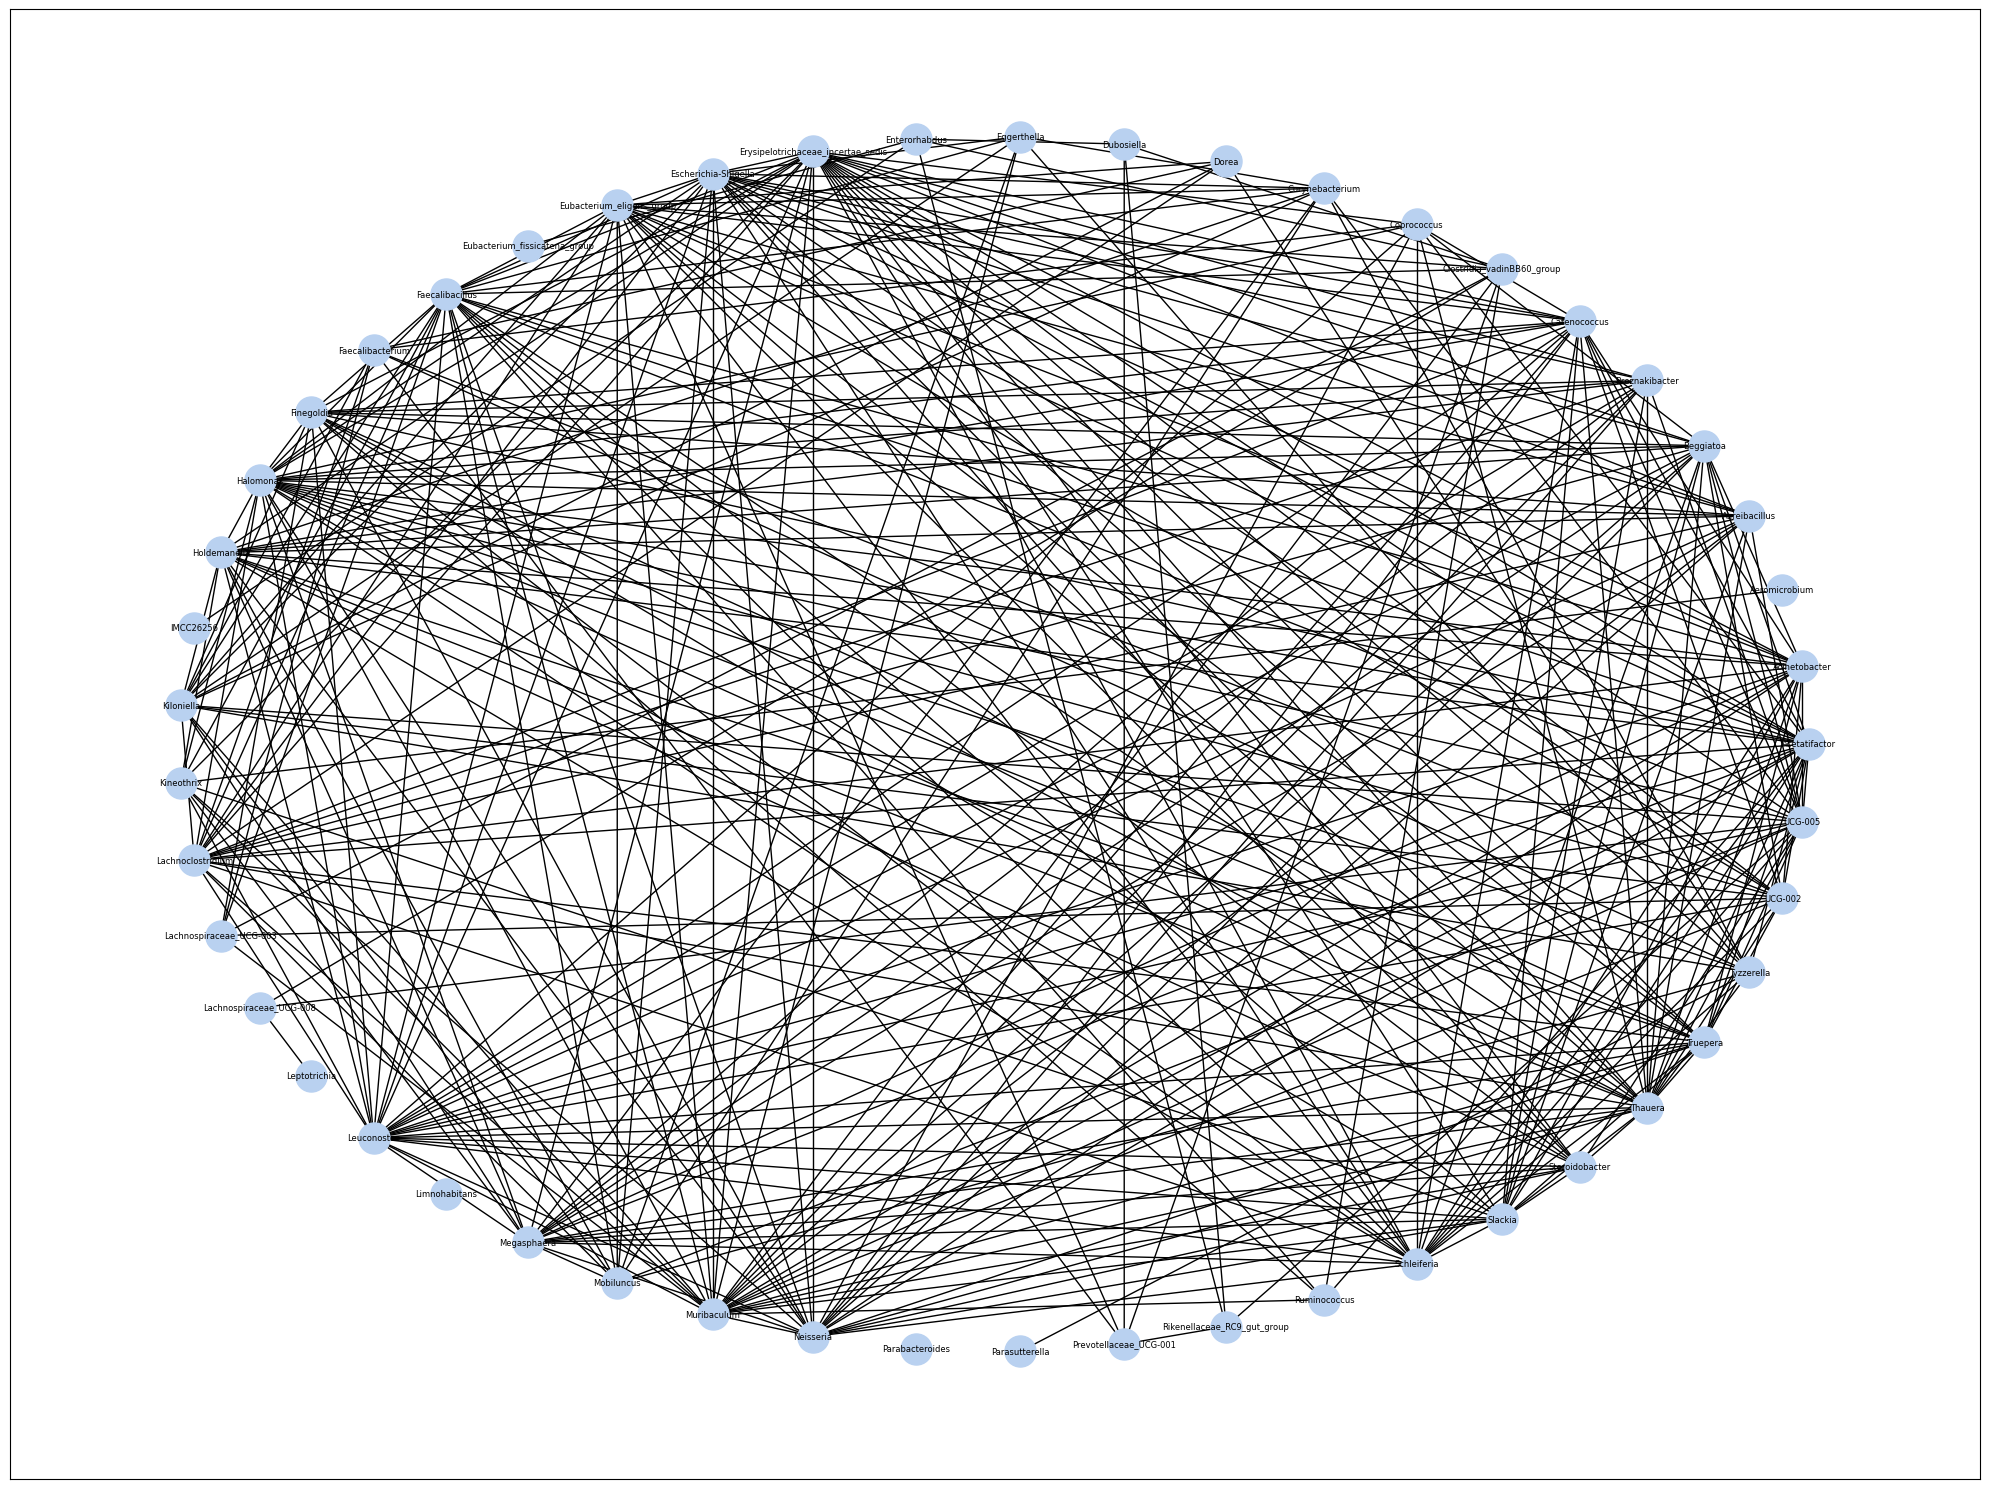

In [101]:
pcos_ouralg = run_ouralg(pcos_adj, pcos, list(pcos.columns), fisherz)
graph_networkx(pcos_ouralg, list(pcos.columns), 'ouralg_pcos')

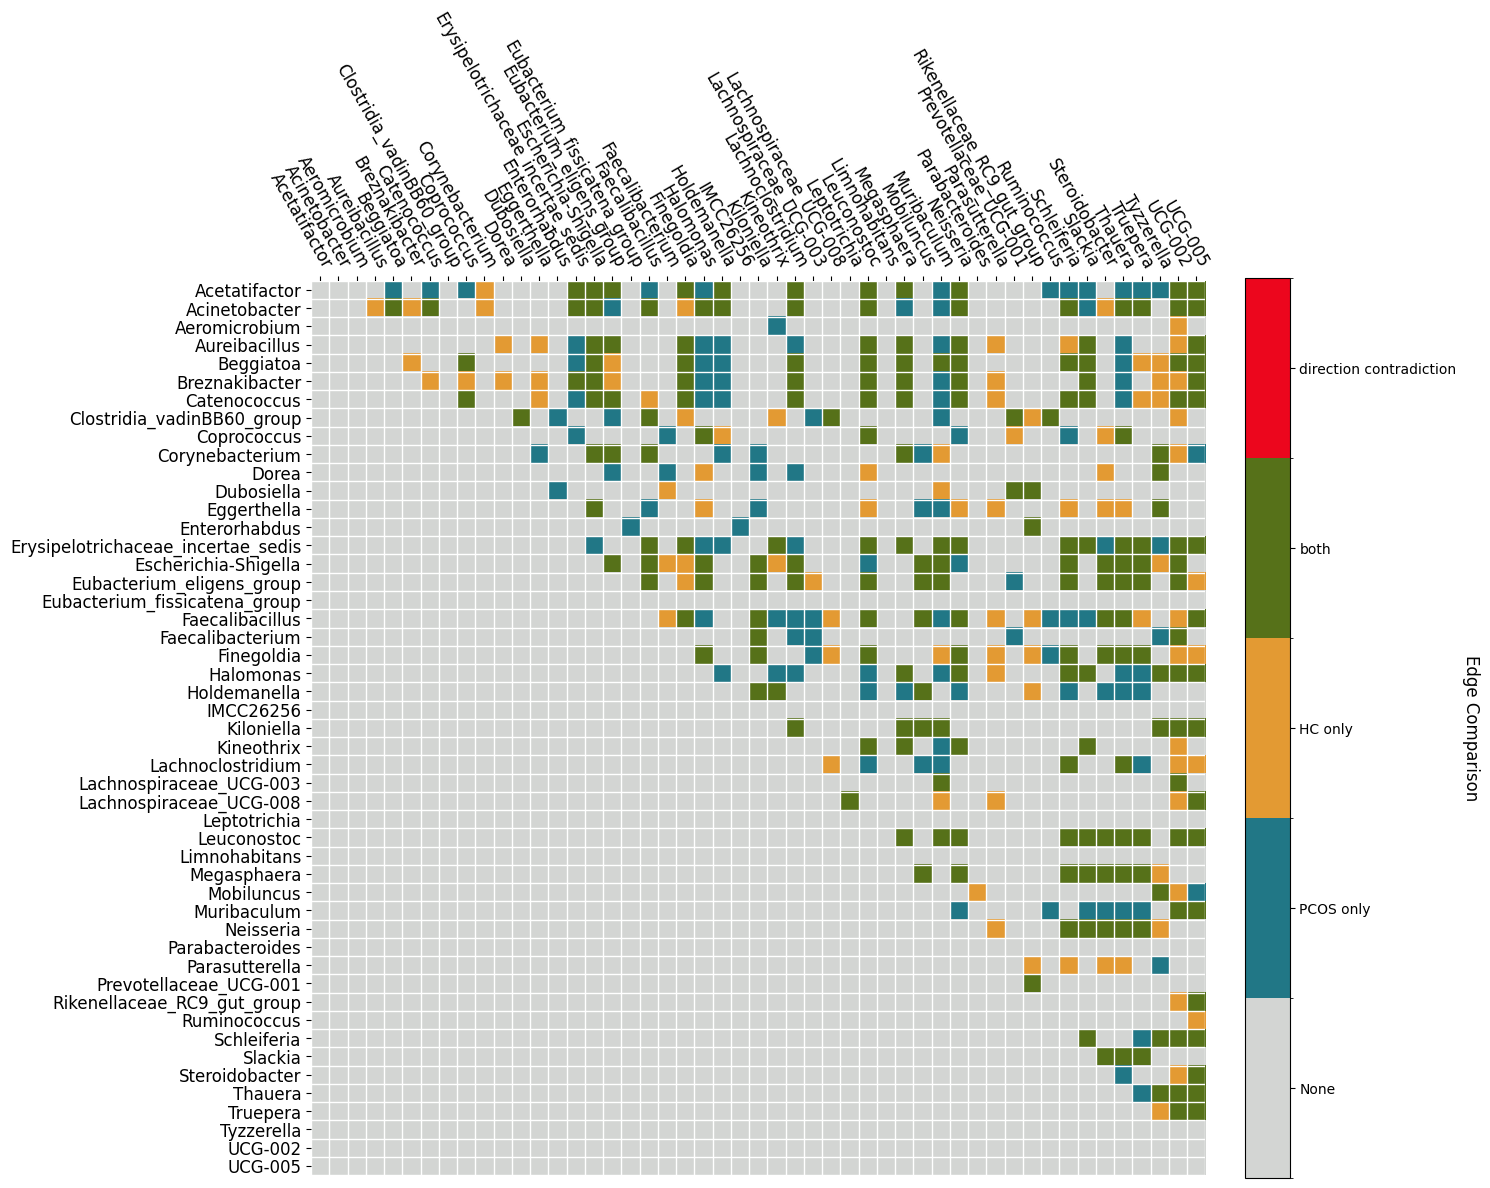

In [151]:
build_adjacency_matrix_heatmap_of_edges(np.triu(pcos_ouralg), np.triu(hc_ouralg), list(hc.columns), 'ouralg', 'ouralg_heatmap')

In [118]:
def fisherz(genus_A, genus_B, genus_C, data):
    '''
    Run the Fisher Z (conditional) independence test between genus_A and genus_B conditioned on genus_c.

    :param: genus_A: index of the first genus to test independence
    :param: genus_B: index of the second genus to test independence
    :param: genus_C: index/list of index of the conditioning set
    :param: data: data containing the genus values
    '''
    fisherz_obj = CIT(data.values, "fisherz")
    pValue = fisherz_obj(genus_A, genus_B, genus_C)
    return pValue


def run_ouralg(adj_matrix, data, genus_lst, indep_test):
    '''
    Run our algorithm on the data and save the plot of the resulting causal graph. The methodology can be found in the associated paper. Returns the resulting adjacency matrix.

    :param: adj_matrix: adjacency matrix of the correlation graph from the paper
    :param: data: data for the corresponding cohort
    :param: genus_lst: list of genus corresponding to the adjacency matrix as node labels
    :param: indep_test: choice of independence test

    :return: the updated adjacency matrix
    '''
    adj_df = pd.DataFrame(adj_matrix, columns=genus_lst, index=genus_lst)

    
    def create_tuples(genus_lst, genus_A, genus_B):
        '''
        Creates tuples of 2 combinations for all items in genus_lst except genus_a and genus_b.
        
        :param: genus_lst: list of genus names
        :param: genus_A: index of the first genus to exclude
        :param: genus_B: index of the second genus to exclude
    
        :return: list of tuples, where each tuple contains two distinct genus names from genus_lst, excluding genus_a and genus_b.
        '''
        filtered_genus_lst = [x for x in range(len(genus_lst)) if (x != genus_A) and (x != genus_B)]
        combinations = list(itertools.combinations(filtered_genus_lst, 2))
        
        return combinations
        
    
    removed_edges = {}

    for i in range(len(genus_lst)):
        for j in range(len(genus_lst)):
            if adj_df.iloc[i, j] == 1.0:
                genus_A = i
                genus_B = j
                for k in range(len(genus_lst)):
                    if k != i and k != j:
                        genus_C = [k]
                        p_value = indep_test(genus_A, genus_B, genus_C, data)
    
                        if p_value < 0.05: # no multiple testing correction
                            adj_df.iloc[i, j] = 0
                            removed_edges[(i, j)] = [genus_C]
                            break
    
    for i in range(len(genus_lst)):
        for j in range(len(genus_lst)):
            if adj_df.iloc[i, j] == 1.0:
                genus_A = i
                genus_B = j
                combinations = create_tuples(genus_lst, genus_A, genus_B)
    
                for k in combinations:
                    genus_C = k
                    p_value = indep_test(genus_A, genus_B, list(genus_C), data)
    
                    if p_value < 0.05:
                        adj_df.iloc[i, j] = 0
                        removed_edges[(i, j)] = [genus_C]
                        break
                    else:
                        adj_df.iloc[i, j] = 2
                        
    return adj_df.values

def graph_networkx(adj_matrix, genus_lst, fp):
    '''
    Create a NetworkX graph of the adjacency matrix and corresponding genus as node labels. Currently uses the circular layout for optimal viewing.

    :param: adj_matrix: adjacency matrix of size 45 x 45 of the genus to genus correlations
    :param: genus_lst: list of genus corresponding to the adjacency matrix as node labels
    '''
    if 1 in np.unique(adj_matrix):
        edge_val = 1
        edge_color = "gray"

    if 2 in np.unique(adj_matrix):
        edge_val = 2
        edge_color = "black"
        
    rows, cols = np.where(adj_matrix == edge_val)
    edges = zip(rows.tolist(), cols.tolist())
    edges = zip(rows.tolist(), cols.tolist())
    edge_list = list(edges)
    graph_labels = {i: genus_lst[i]for i in range(len(genus_lst))}
    
    plt.figure(figsize=(20,15))
    G = nx.Graph()
    G.add_nodes_from(range(len(genus_lst)))
    G.add_edges_from(edge_list)
    pos_spaced = nx.circular_layout(G)
    nx.draw_networkx(G, pos_spaced, node_size=500, font_size=6, labels=graph_labels, with_labels=True, edge_color=edge_color, node_color="#b9d1f0")
    plt.savefig(f"{fp}.png")


def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current Axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom", fontsize=12)

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels, fontsize=12)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels, fontsize=12)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-60, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="white", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


def build_adjacency_matrix_heatmap_of_edges(IR_graph, IS_graph, genera, alg, fp):
    """
    Given the two IR and IS causal graphs, overlay the two and plot their comparative edges. 

    :param: IR_graph: causallearn CausalGraph object for the IR cohort
    :param: IS_graph: causallearn CausalGraph object for the IS cohort
    :param: genera: list of genera in the same order of the columns of the graphs
    :param: alg: string of algorithm type from the following list, ["pc", "fci", "ges", "ouralg"]
    :param: fp: filepath name of resulting heatmap
    """
    if alg == "ouralg":
        IR_adjmat = IR_graph
        IS_adjmat = IS_graph

    overlay = np.zeros(IR_adjmat.shape)
    overlay_directed = np.zeros(IR_adjmat.shape)

    for i in range(len(genera)):
        for j in range(len(genera)):
            IR_ij = IR_adjmat[i, j]
            IR_ji = IR_adjmat[j, i]
            IS_ij = IS_adjmat[i, j]
            IS_ji = IS_adjmat[j, i]

            # our algorithm edges
            if alg == "ouralg":
                if IR_ij == 2 and IS_ij == 2:
                    overlay[i, j] = 3
                elif IR_ij == 0 and IS_ij == 2:
                    overlay[i, j] = 2
                elif IR_ij == 2 and IS_ij == 0:
                    overlay[i, j] = 1
                else:
                    overlay[i, j] = 0 
                    
            # IS only
            elif (IR_ij == 0 and IR_ji == 0 and IS_ij == 1):
                overlay[i, j] = 2
                if IS_ji == tail:
                    overlay_directed[i, j] = 1
                if alg == "fci":
                    if IS_ji == circle:
                        overlay_directed[i, j] = 1
                    if IS_ji == 1:
                        overlay_directed[i, j] = 3

            # IR only
            elif (IR_ij == 1 and IS_ij == 0 and IS_ji == 0):
                overlay[i, j] = 1
                if IR_ji == tail:
                    overlay_directed[i, j] = 1
                if alg == "fci": 
                    if IR_ji == circle:
                        overlay_directed[i, j] = 1
                    if IR_ji == 1:
                        overlay_directed[i, j] = 3
                    
            # no edges (universal)
            else:
                overlay[i, j] = 0
                overlay_directed[i, j] = 0

    fig, ax = plt.subplots(figsize=(15, 15))

    edge_comp = ["None", "PCOS only", "HC only", "both", "direction contradiction"]
    norm = matplotlib.colors.BoundaryNorm(np.linspace(-0.5, 4.5, 6), 5)
    fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: edge_comp[norm(x)])
    
    upper_tri_mask = np.tri(45, 45, k=-1).T
    
    cmap = ListedColormap(["#d3d5d3", "#217786", "#e39a33", "#567119", "#ec061d"])

    # np.ma.array(overlay, mask=upper_tri_mask).T
    if alg != "ouralg":
        overlay = overlay.T
        overlay_directed = overlay_directed.T
    im, _ = heatmap(overlay, genera, genera, ax=ax, 
                    cmap=cmap, norm=norm, 
                    cbar_kw=dict(ticks=np.arange(0, 5), format=fmt, fraction=0.046, pad=0.04), cbarlabel="Edge Comparison")
    
    def func(x, pos):
        if x == 1:
            return "▶"
        elif x == 2:
            return "●"
        elif x == 3:
            return "C"
        elif x == 4:
            return "C●"
        else:
            return ""

    # np.ma.array(overlay_directed, mask=upper_tri_mask).T
    annotate_heatmap(im, data=overlay_directed, valfmt=matplotlib.ticker.FuncFormatter(func), threshold=0)
    
    plt.tight_layout()
    plt.savefig(f"{fp}.png")
    plt.show()

    return

# 1b. CD-NOD

In [140]:
cg = cdnod(data.iloc[:, 1:].values, data[['group']].values)

  0%|          | 0/50 [00:00<?, ?it/s]

In [141]:
pyd = GraphUtils.to_pydot(cg.G, labels=list(data.columns[1:]) + [data.columns[0]])
pyd.write_png("cdnod.png")

In [144]:
for node in cg.G.get_adjacent_nodes(cg.G.get_node('X50')):
    print(node.get_name())

X3
X8
X22
X23
X26
X41
X47
X49


In [148]:
data.columns[[3, 8, 22, 23, 26, 41, 47, 49]]

Index(['Aeromicrobium', 'Clostridia_vadinBB60_group', 'Halomonas',
       'Holdemanella', 'Kineothrix', 'Ruminococcus', 'Tyzzerella', 'UCG-005'],
      dtype='object')